# Data exploration

we want to view our data in a visual way first.
once it is visualized we can play with some features to see what our data can tell us.

# here are the previous steps from the prior notebooks


In [1]:
#import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
covid_out = pd.read_csv('COVID-19_Outcomes_by_Testing_Cohorts__Cases__Hospitalizations__and_Deaths_20240603.csv')
covid_waste = pd.read_csv('SARS-CoV-2_concentrations_measured_in_NYC_Wastewater_20240603.csv')

In [3]:
def column_summary(covid_out):
    summary_data = []
    
    for col_name in covid_out.columns:
        col_dtype = covid_out[col_name].dtype
        num_of_nulls = covid_out[col_name].isnull().sum()
        num_of_non_nulls = covid_out[col_name].notnull().sum()
        num_of_distinct_values = covid_out[col_name].nunique()
        
        if num_of_distinct_values <= 10:
            distinct_values_counts = covid_out[col_name].value_counts().to_dict()
        else:
            top_10_values_counts = covid_out[col_name].value_counts().head(10).to_dict()
            distinct_values_counts = {k: v for k, v in sorted(top_10_values_counts.items(), key=lambda item: item[1], reverse=True)}

        summary_data.append({
            'col_name': col_name,
            'col_dtype': col_dtype,
            'num_of_nulls': num_of_nulls,
            'num_of_non_nulls': num_of_non_nulls,
            'num_of_distinct_values': num_of_distinct_values,
            'distinct_values_counts': distinct_values_counts
        })
    
    summary_covid_out = pd.DataFrame(summary_data)
    return summary_covid_out
summary_covid_out = column_summary(covid_out)
display(summary_covid_out)

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,distinct_values_counts
0,extract_date,object,0,176148,532,"{'10/01/2021': 625, '09/30/2021': 625, '09/29/..."
1,specimen_date,object,0,176148,643,"{'03/31/2020': 532, '03/13/2020': 532, '03/26/..."
2,Number_tested,int64,0,176148,14740,"{1: 6008, 2: 4459, 4: 1343, 3: 802, 63: 524, 9..."
3,Number_confirmed,int64,0,176148,6344,"{0: 8042, 1: 5333, 2: 1088, 4: 571, 5: 533, 6:..."
4,Number_hospitalized,int64,0,176148,1868,"{0: 13683, 1: 1996, 33: 1286, 16: 1070, 22: 10..."
5,Number_deaths,int64,0,176148,915,"{0: 22138, 1: 7585, 2: 6750, 3: 5690, 4: 4027,..."


In [4]:
covid_out['specimen_date']=covid_out['specimen_date'].astype('str')
covid_out['specimen_date']= pd.to_datetime(covid_out['specimen_date'], errors= 'coerce')
covid_out= covid_out.drop('extract_date', axis=1)
covid_out= covid_out.rename(columns={'specimen_date':'sample_date',
                                        'Number_tested':'number_tested',
                                        'Number_confirmed':'number_confirmed',
                                        'Number_hospitalized':'number_hospitalized',})
covid_out=covid_out.dropna()


In [5]:
covid_out.isnull().sum()

sample_date            0
number_tested          0
number_confirmed       0
number_hospitalized    0
Number_deaths          0
dtype: int64

In [6]:
def column_summary(covid_waste):
    summary_data = []
    
    for col_name in covid_waste.columns:
        col_dtype = covid_waste[col_name].dtype
        num_of_nulls = covid_waste[col_name].isnull().sum()
        num_of_non_nulls = covid_waste[col_name].notnull().sum()
        num_of_distinct_values = covid_waste[col_name].nunique()
        
        if num_of_distinct_values <= 10:
            distinct_values_counts = covid_waste[col_name].value_counts().to_dict()
        else:
            top_10_values_counts = covid_waste[col_name].value_counts().head(10).to_dict()
            distinct_values_counts = {k: v for k, v in sorted(top_10_values_counts.items(), key=lambda item: item[1], reverse=True)}

        summary_data.append({
            'col_name': col_name,
            'col_dtype': col_dtype,
            'num_of_nulls': num_of_nulls,
            'num_of_non_nulls': num_of_non_nulls,
            'num_of_distinct_values': num_of_distinct_values,
            'distinct_values_counts': distinct_values_counts
        })
    
    summary_covid_waste = pd.DataFrame(summary_data)
    return summary_covid_waste
summary_covid_waste = column_summary(covid_waste)
display(summary_covid_waste)

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,distinct_values_counts
0,Sample Date,object,0,5292,334,"{'02/04/2024': 28, '01/09/2024': 28, '02/20/20..."
1,Test date,object,21,5271,357,"{'02/08/2023': 28, '03/22/2023': 28, '04/12/20..."
2,WRRF Name,object,0,5292,14,"{'26th Ward': 378, 'Bowery Bay': 378, 'Coney I..."
3,WRRF Abbreviation,object,0,5292,14,"{'26W': 378, 'BB': 378, 'CI': 378, 'HP': 378, ..."
4,Concentration SARS-CoV-2 gene target (N1 Copie...,float64,173,5119,4822,"{86016.0: 3, 71880.0: 3, 75384.0: 3, 262.0: 3,..."
5,Per capita SARS-CoV-2 load (N1 copies per day ...,float64,207,5085,2085,"{10400000.0: 16, 11800000.0: 15, 11600000.0: 1..."
6,Annotation,object,3910,1382,67,"{'Multiplex Overlap Study': 336, 'This sample ..."
7,"Population Served, estimated",int64,0,5292,14,"{318262: 378, 894311: 378, 647635: 378, 781885..."
8,Technology,object,0,5292,3,"{'RT-qPCR - N1': 3290, 'dPCR - N1': 1358, 'dPC..."


In [7]:
def column_summary(covid_waste):
    summary_data = []
    
    for col_name in covid_waste.columns:
        col_dtype = covid_waste[col_name].dtype
        num_of_nulls = covid_waste[col_name].isnull().sum()
        num_of_non_nulls = covid_waste[col_name].notnull().sum()
        num_of_distinct_values = covid_waste[col_name].nunique()
        
        if num_of_distinct_values <= 10:
            distinct_values_counts = covid_waste[col_name].value_counts().to_dict()
        else:
            top_10_values_counts = covid_waste[col_name].value_counts().head(10).to_dict()
            distinct_values_counts = {k: v for k, v in sorted(top_10_values_counts.items(), key=lambda item: item[1], reverse=True)}

        summary_data.append({
            'col_name': col_name,
            'col_dtype': col_dtype,
            'num_of_nulls': num_of_nulls,
            'num_of_non_nulls': num_of_non_nulls,
            'num_of_distinct_values': num_of_distinct_values,
            'distinct_values_counts': distinct_values_counts
        })
    
    summary_covid_waste = pd.DataFrame(summary_data)
    return summary_covid_waste
summary_covid_waste = column_summary(covid_waste)
display(summary_covid_waste)

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,distinct_values_counts
0,Sample Date,object,0,5292,334,"{'02/04/2024': 28, '01/09/2024': 28, '02/20/20..."
1,Test date,object,21,5271,357,"{'02/08/2023': 28, '03/22/2023': 28, '04/12/20..."
2,WRRF Name,object,0,5292,14,"{'26th Ward': 378, 'Bowery Bay': 378, 'Coney I..."
3,WRRF Abbreviation,object,0,5292,14,"{'26W': 378, 'BB': 378, 'CI': 378, 'HP': 378, ..."
4,Concentration SARS-CoV-2 gene target (N1 Copie...,float64,173,5119,4822,"{86016.0: 3, 71880.0: 3, 75384.0: 3, 262.0: 3,..."
5,Per capita SARS-CoV-2 load (N1 copies per day ...,float64,207,5085,2085,"{10400000.0: 16, 11800000.0: 15, 11600000.0: 1..."
6,Annotation,object,3910,1382,67,"{'Multiplex Overlap Study': 336, 'This sample ..."
7,"Population Served, estimated",int64,0,5292,14,"{318262: 378, 894311: 378, 647635: 378, 781885..."
8,Technology,object,0,5292,3,"{'RT-qPCR - N1': 3290, 'dPCR - N1': 1358, 'dPC..."


In [8]:
covid_waste=covid_waste.drop('Annotation', axis=1)
covid_waste=covid_waste.drop('Technology', axis=1)
covid_waste=covid_waste.drop('WRRF Abbreviation', axis=1)
covid_waste=covid_waste.drop('Test date', axis=1)

covid_waste['Sample Date']=covid_waste['Sample Date'].astype('str')
covid_waste['Sample Date']= pd.to_datetime(covid_waste['Sample Date'], errors= 'coerce')

covid_waste= covid_waste.rename(columns={'Sample Date':'sample_date',
                                        'WRRF Name':'collection_site',
                                        'Concentration SARS-CoV-2 gene target (N1 Copies/L) ':'concentration',
                                        'Per capita SARS-CoV-2 load (N1 copies per day per population)':'per_capita',
                                        'Population Served, estimated ':'est_pop'})
covid_waste=covid_waste.dropna()





In [9]:
covid_waste.isnull().sum()

sample_date        0
collection_site    0
concentration      0
per_capita         0
est_pop            0
dtype: int64

now that we have our previous steps lets investigae the data

# exploring the data

lets graph the data

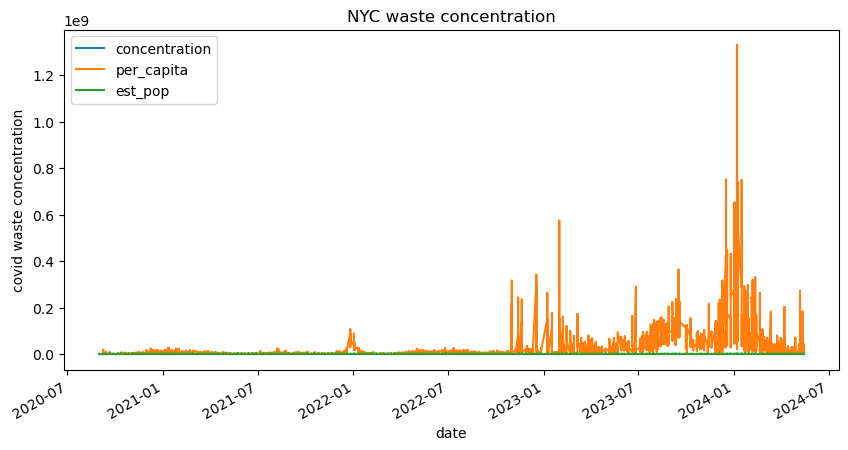

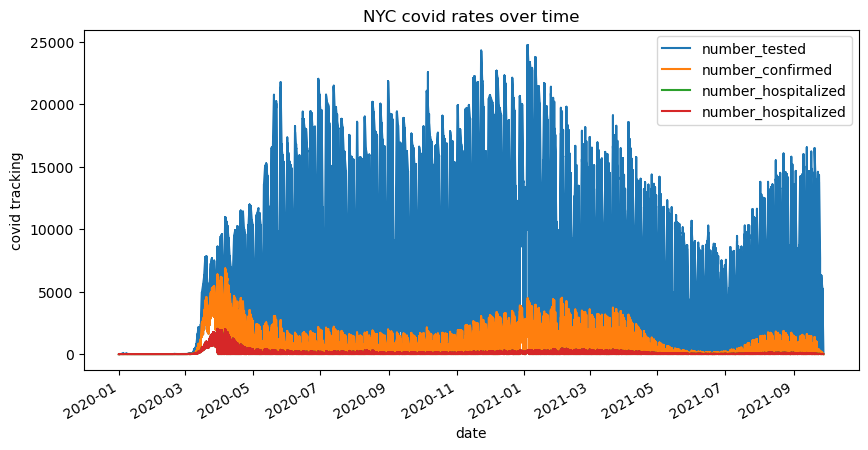

In [10]:
covid_waste.plot(x='sample_date', y=['collection_site', 'concentration', 'per_capita', 'est_pop'], figsize=(10,5))
                 
plt.xlabel('date')

plt.ylabel('covid waste concentration')

plt.title('NYC waste concentration')

plt.show()




covid_out.plot(x='sample_date', y=['number_tested', 'number_confirmed', 'number_hospitalized', 'number_hospitalized'],figsize=(10,5))

plt.xlabel('date')

plt.ylabel('covid tracking')

plt.title('NYC covid rates over time')

plt.show()



the data is not on a similar time frame. lets correct that

In [11]:
print(covid_out['sample_date'].max())
print(covid_out['sample_date'].min())
print('covid out dates')
print(covid_waste['sample_date'].max())
print(covid_waste['sample_date'].min())
print('covid waste dates')

2021-09-28 00:00:00
2020-01-01 00:00:00
covid out dates
2024-05-14 00:00:00
2020-08-31 00:00:00
covid waste dates


In [12]:
mask1 = (covid_waste['sample_date'] > '2020-08-01') & (covid_waste['sample_date'] <= '2021-09-01')

covid_waste_short= covid_waste.loc[mask1]
print(covid_waste_short.head())

mask2 = (covid_out['sample_date'] > '2020-08-01') & (covid_out['sample_date'] <= '2021-09-01')
covid_out_short= covid_out.loc[mask2]
print(covid_out_short.head())


  sample_date collection_site  concentration  per_capita  est_pop
0  2020-08-31       26th Ward          389.0    264000.0   318262
1  2020-08-31      Bowery Bay         1204.0    444000.0   894311
2  2020-08-31    Coney Island          304.0    169000.0   647635
3  2020-08-31     Hunts Point          940.0    574000.0   781885
4  2020-08-31     Jamaica Bay          632.0    233000.0   735054
      sample_date  number_tested  number_confirmed  number_hospitalized  \
12693  2020-08-02             40                 1                    0   
12768  2020-08-02           1259                12                    4   
12835  2020-08-03             71                 1                    0   
12926  2020-08-02           3018                54                    8   
12932  2020-08-05            104                 2                    0   

       Number_deaths  
12693              0  
12768              0  
12835              0  
12926              0  
12932              0  


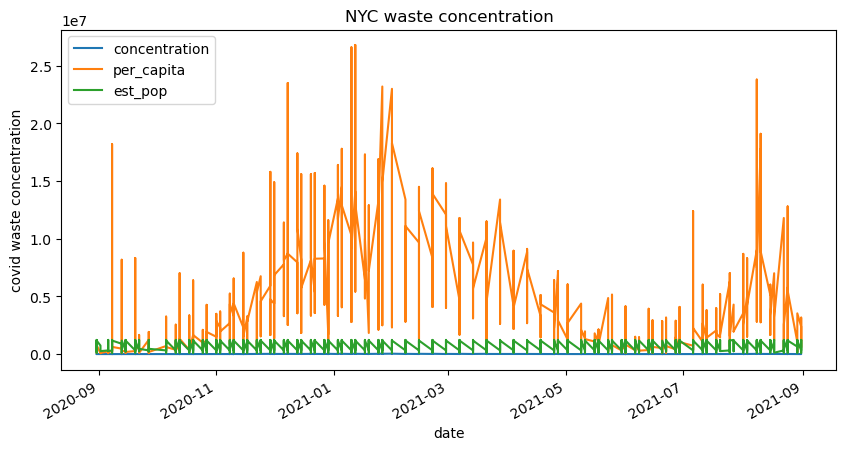

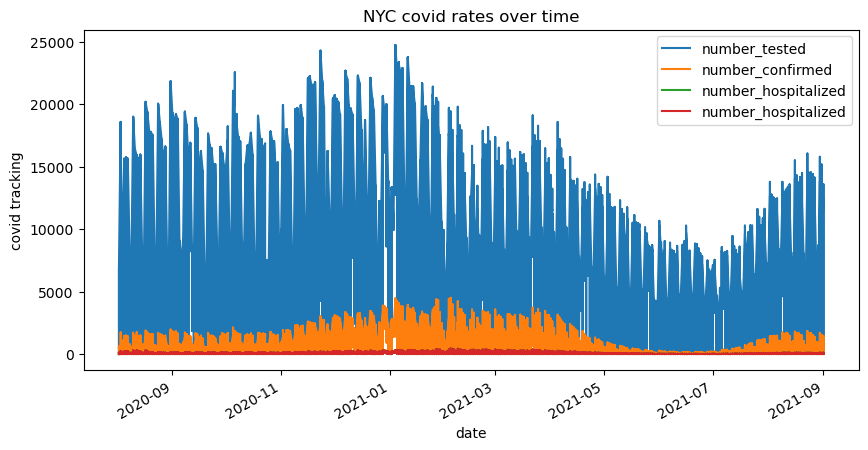

In [13]:
covid_waste_short.plot(x='sample_date', y=['collection_site', 'concentration', 'per_capita', 'est_pop'], figsize=(10,5))
                 
plt.xlabel('date')

plt.ylabel('covid waste concentration')

plt.title('NYC waste concentration')

plt.show()




covid_out_short.plot(x='sample_date', y=['number_tested', 'number_confirmed', 'number_hospitalized', 'number_hospitalized'],figsize=(10,5))

plt.xlabel('date')

plt.ylabel('covid tracking')

plt.title('NYC covid rates over time')

plt.show()



upon review of the graphs we can sort of see there could be a relationship between per capita from our NYC waste data and the number_tested and number confirmed.

Inspecting the NYC data website about these data sets reveals that per_capita is a calculated value from the city. it is calculated by finding how much virus material is in the waste water, how much raw untreated waste comes into the plant, and how many people the treatment plant serves in a 24 hour period.

The number tested from the COVID rates over time graph could be that people felt unwell and wanted to get tested or it was part of workplace compliance for workers unable to social distance.

we can also see that our data is a timeseries kind of data set.

## lets explore what is correlated

In [14]:
# import the neccesary packages
import seaborn as sns

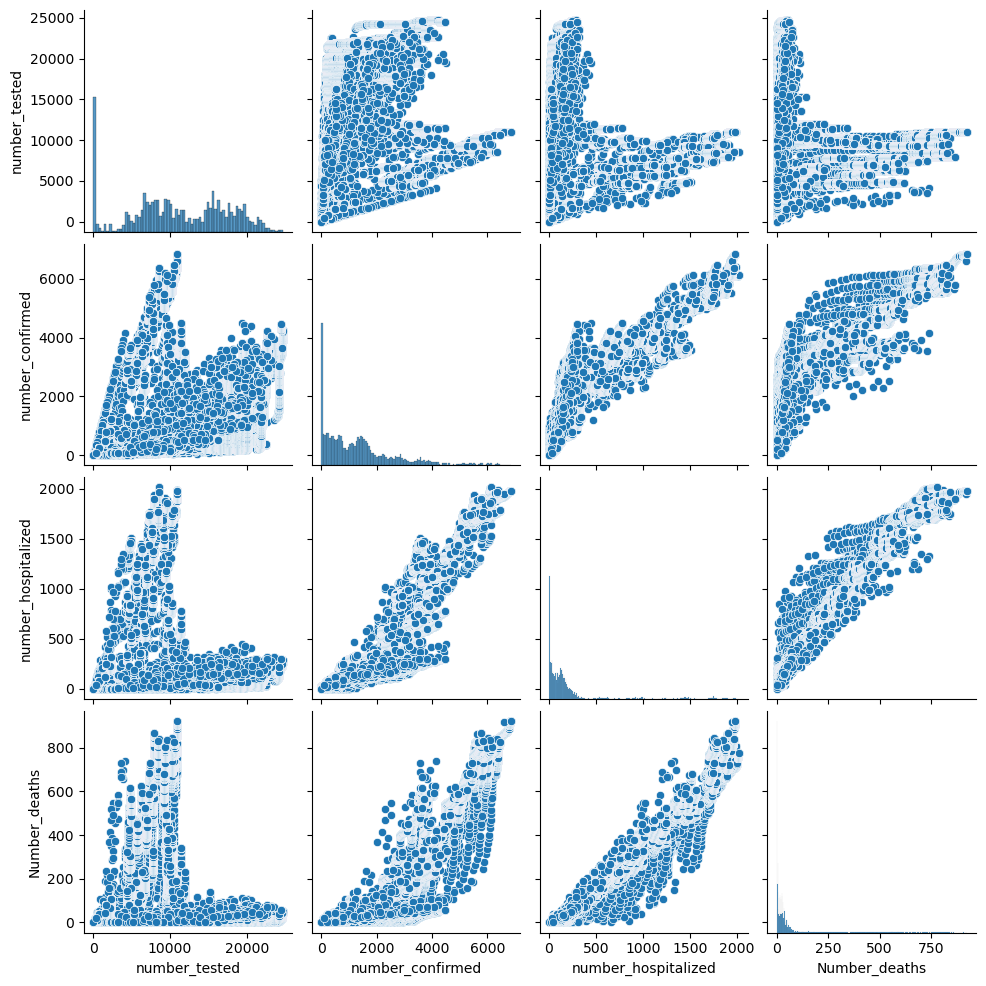

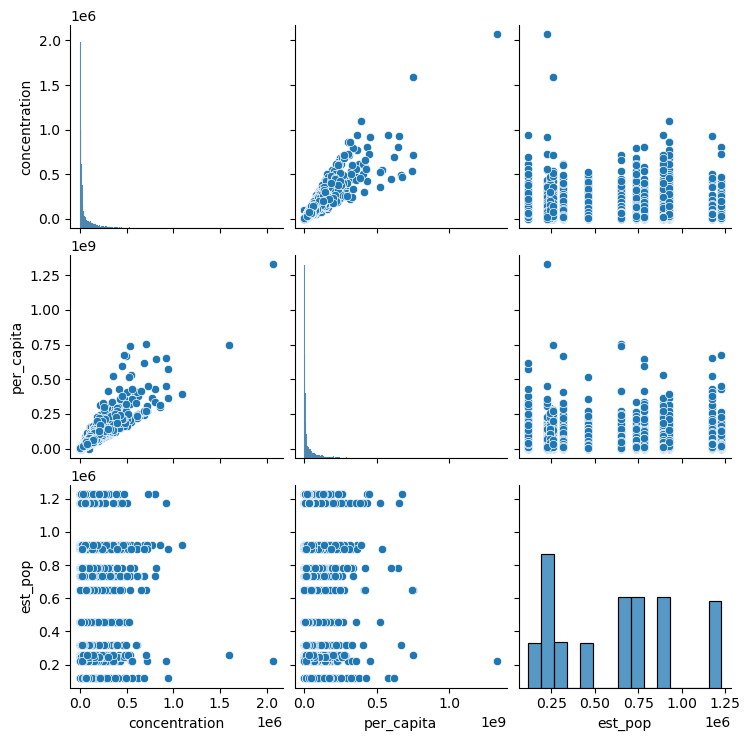

In [16]:

sns.pairplot(covid_out)
sns.pairplot(covid_waste)

The seaborn package includes useful tools to first explore what points of data are correlating within their own DataFrames.

Our covid_case data has a strong correlation between number_hospitalized and number_confirmed. number_deaths and number_hospitalized also correlate strongly. it looks like the remaining features do not correlate strongly

## now lets combine the DataFrames 

In [17]:
covid_time1= pd.merge(covid_waste_short, covid_out_short, on='sample_date')
covid_time1.head()


,sample_date,collection_site,concentration,per_capita,est_pop,number_tested,number_confirmed,number_hospitalized,Number_deaths
0,2020-08-31,26th Ward,389.0,264000.0,318262,60,1,0,0
1,2020-08-31,26th Ward,389.0,264000.0,318262,3561,32,1,0
2,2020-08-31,26th Ward,389.0,264000.0,318262,12431,80,10,0
3,2020-08-31,26th Ward,389.0,264000.0,318262,17473,145,18,0
4,2020-08-31,26th Ward,389.0,264000.0,318262,18940,172,18,0


In [18]:
covid_time1.isnull().sum()

sample_date            0
collection_site        0
concentration          0
per_capita             0
est_pop                0
number_tested          0
number_confirmed       0
number_hospitalized    0
Number_deaths          0
dtype: int64

data looks good so far

lets visualize the DataFrame 

lets create a heat map to get a correlation value



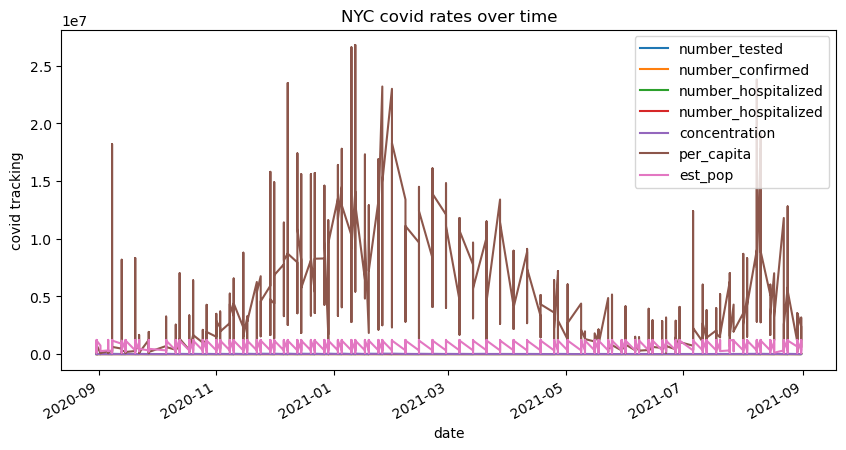

In [19]:
covid_time1.plot(x='sample_date', y=['number_tested', 'number_confirmed', 'number_hospitalized', 'number_hospitalized', 'collection_site', 'concentration', 'per_capita', 'est_pop'],figsize=(10,5))

                 
plt.xlabel('date')

plt.ylabel('covid tracking')

plt.title('NYC covid rates over time')

plt.show()

our data visualization can be better visualized with a heat map to show neumerical correlation

/var/folders/mj/zknsgww149qf6c6r1yp4hz2h0000gn/T/ipykernel_60358/2932416337.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(covid_time1.corr(), annot=True)


<Axes: >

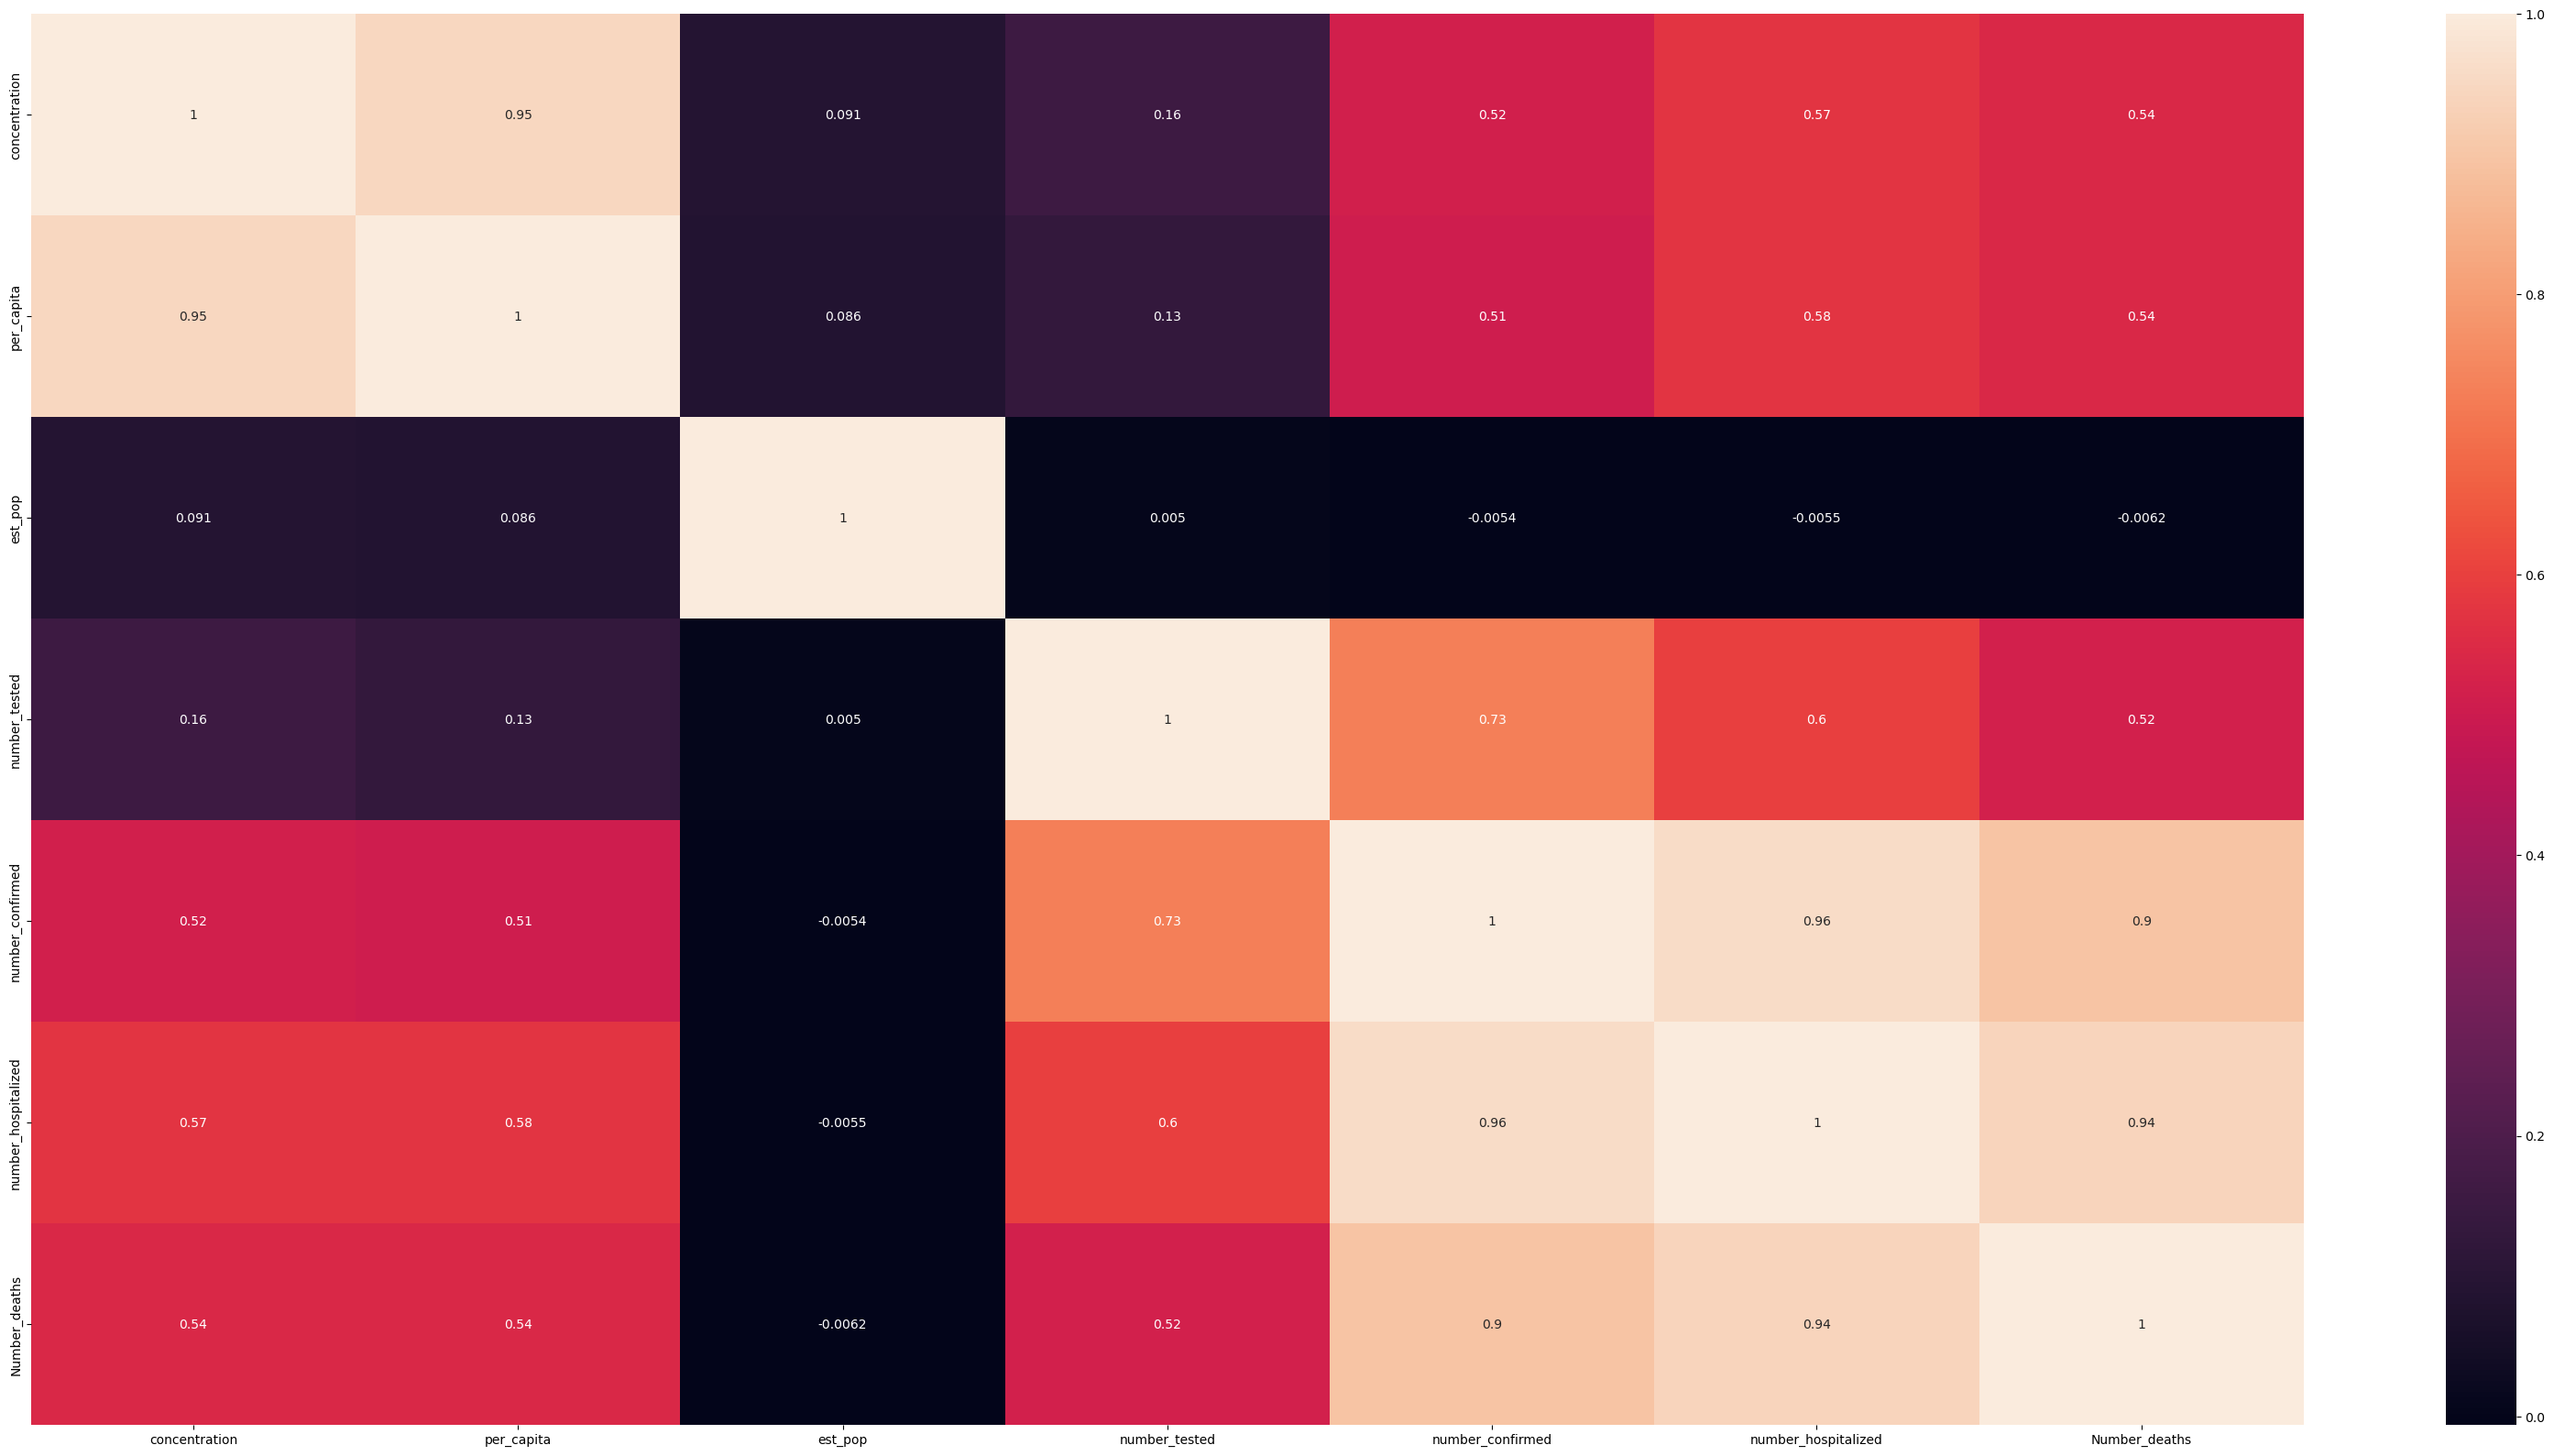

In [20]:
plt.figure(figsize=(40, 20))

sns.heatmap(covid_time1.corr(), annot=True)

our initial observations seem to suggest that per_capita and number_confirmed, number_hospitalized, number_deaths have some correlation.

lets take a coloser look at our values

In [21]:
correlation_matrix= covid_time1.corr(method='pearson')
print(correlation_matrix)

                     concentration  per_capita   est_pop  number_tested  \
concentration             1.000000    0.945509  0.091303       0.157940   
per_capita                0.945509    1.000000  0.086021       0.131051   
est_pop                   0.091303    0.086021  1.000000       0.005026   
number_tested             0.157940    0.131051  0.005026       1.000000   
number_confirmed          0.515754    0.508627 -0.005434       0.730787   
number_hospitalized       0.573271    0.575328 -0.005454       0.598586   
Number_deaths             0.543993    0.540407 -0.006200       0.516646   

                     number_confirmed  number_hospitalized  Number_deaths  
concentration                0.515754             0.573271       0.543993  
per_capita                   0.508627             0.575328       0.540407  
est_pop                     -0.005434            -0.005454      -0.006200  
number_tested                0.730787             0.598586       0.516646  
number_confirmed   

/var/folders/mj/zknsgww149qf6c6r1yp4hz2h0000gn/T/ipykernel_60358/2028093755.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix= covid_time1.corr(method='pearson')
